# シルエット係数


クラスタ内の **凝集度** として、$$\boldsymbol{x}^{(i)}$$ が属するクラスタ $$C_{\rm in}$$ の他の点までの平均距離を計算：

$$
a^{(i)} = \cfrac{1}{|C_{\rm in}|-1} \displaystyle \sum_{\boldsymbol{x}^{(j)} \in C_{\rm in}} \left\| \boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)} \right\|
$$

別クラスタからの **乖離度** として、$$\boldsymbol{x}^{(i)}$$ に最も近い別クラスタ $$C_{\rm near}$$ に属する点までの平均距離を計算：

$$
b^{(i)} = \cfrac{1}{|C_{\rm near}|} \displaystyle \sum_{\boldsymbol{x}^{(j)} \in C_{\rm near}} \left\| \boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)} \right\|
$$

$$a^{(i)}, b^{(i)}$$ のうち大きい方で $$b^{(i)} - a^{(i)}$$ を割って **シルエット係数** を計算：

$$
s^{(i)} = \cfrac{b^{(i)} - a^{(i)}}{\max(a^{(i)}, b^{(i)})}
$$

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def calc_silhouette(data, clusters):
    """
    クラスタリングのシルエット係数の計算
    
    Parameters
    ----------
    data :
        データサンプル
    clusters :
        各データサンプルが属するクラスタ
    """
    n = len(data)
    num_clusters = len(np.unique(clusters))
    cl_ids = []
    centroids = []
    for c in range(num_clusters):
        ids = np.where(clusters == c)[0]
        cl_ids.append(ids)
        centroids.append(np.average(data[ids], axis=0))
    silhouette = np.zeros(n)
    for c in range(num_clusters):
        for i in cl_ids[c]:
            nearest_clusters = np.argsort(np.sum((data[i]-centroids)**2, axis=1))
            c_nearest = nearest_clusters[1] if nearest_clusters[0]==c else nearest_clusters[0]
            a = np.sum(np.sqrt(np.sum((data[i]-data[cl_ids[c]])**2, axis=1))) / (len(cl_ids[c])-1)
            b = np.average(np.sqrt(np.sum((data[i]-data[cl_ids[c_nearest]])**2, axis=1)))
            silhouette[i] = (b-a) / max(a, b)
    return silhouette


def plot_silhouette(data, clusters):
    """
    シルエット係数を計算・描画
    """
    cl_size = {}
    for c in np.unique(clusters):
        cl_size[c] = np.count_nonzero(clusters == c)
    silhouette = calc_silhouette(data, clusters)
    silhouette_ave = np.average(silhouette)
    ids_sorted = np.lexsort((silhouette, clusters))
    data_sorted = data[ids_sorted]
    silhouette_sorted = silhouette[ids_sorted]
    
    plt.figure(figsize=(12, 4))
    # クラスタの描画
    plt.subplot(1, 2, 1)
    plt.title('Clusters')
    start = 0
    for c in range(len(cl_size)):
        plt.scatter(data_sorted[start:start+cl_size[c], 0], data_sorted[start:start+cl_size[c], 1], s=20, label='Cluster {}'.format(c+1))
        start += cl_size[c]
    plt.legend(loc='upper left')
    # シルエット図の描画
    plt.subplot(1, 2, 2)
    plt.title('Silhouette')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Number of Data')
    plt.axvline(silhouette_ave, c='black', linestyle='dashed', label='average = {:.3f}'.format(silhouette_ave))
    start = 0
    for c in range(len(cl_size)):
        plt.barh(range(start, start+cl_size[c]), silhouette_sorted[start:start+cl_size[c]], height=1.0, label='Cluster {}'.format(c+1))
        start += cl_size[c]
    plt.legend(loc='upper left')
    plt.show()

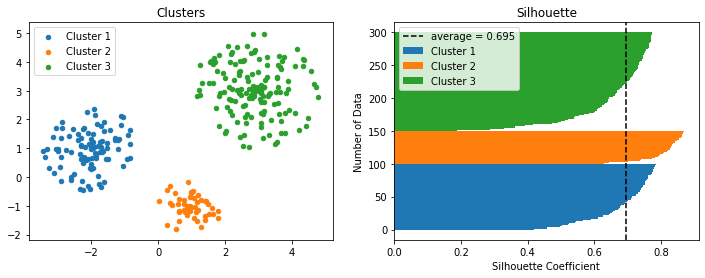

In [2]:
def circle(c_, R_, n_):
    r = R_ * np.random.rand(n_)
    theta = np.random.rand(n_) * 2 * np.pi
    data = np.array([r * np.sin(theta) + c_[0], r * np.cos(theta) + c_[1]]).T
    return data


N = 300
cl_size = {0: N//3, 1: N//6, 2: N//2}
data = np.concatenate([
    circle([-2, 1], 1.5, cl_size[0]),
    circle([1, -1], 1, cl_size[1]),
    circle([3, 3], 2, cl_size[2])
])
clusters = np.array([0]*(cl_size[0]) + [1]*(cl_size[1]) + [2]*(cl_size[2]))

plot_silhouette(data, clusters)